# Analyze Starbucks in Toronto
## by Kyungjin Cho

## 1. Introduction

### What is Starbucks?

**Starbucks Corporation** is an American coffee company and coffeehouse chain. **Starbucks** was founded in Seattle, Washington, in 1971. As of early 2019, the company operates over 30,000 locations worldwide.  

**Starbucks** has been described as the main representative of "second wave coffee," a retrospectively termed movement that popularized artisanal coffee, particularly darkly roasted coffee. Since the 2000s, third wave coffee makers have targeted quality-minded coffee drinkers with hand-made coffee based on lighter roasts, while **Starbucks** nowadays uses automated espresso machines for efficiency and safety reasons.  

**Starbucks** first became profitable in Seattle in the early 1980s. Despite an initial economic downturn with its expansion into the Midwest and British Columbia in the late 1980s, the company experienced revitalized prosperity with its entry into California in the early 1990s. The first **Starbucks** location outside North America opened in Tokyo in 1996; overseas properties now constitute almost one-third of its stores. The company opened an average of two new locations daily between 1987 and 2007. In 2010, the company began its **Starbucks Reserve** program for single-origin coffees and high-end coffee shops. **Starbucks** operates six roasteries with tasting rooms and 43 coffee bars as part of the program. In November 2019, the world's largest **Starbucks** opened in Chicago on the Magnificent Mile as the sixth roastery location.



###  What is the business problem?

These days, everyone knows about Starbucks. Also, Starbucks is the largest coffee shop company in the world. Although some people complain that Starbucks prices are much too high, Starbucks is still becoming more and more popular throughout the world.  


Actually, Starbucks was once thought of as a very exclusive brand, but in some cities there are Starbucks on every block. Therefore, People all over the world are getting used to seeing a Starbucks coffee shop just around the corner. According to the Michelli's book, Starbucks may be popular not only for their coffee, but also for their business style.  

Because of its popularity, well-developed business districts can be developed after Starbucks coffee shops were created. That is, Starbucks coffee shops are giving positive effects to the market of that region.

### Who will be interested in this project?

- Storekeepers who want to open up shops can consider locations of Starbucks coffee shops.  
- House hunters who look for activated commercial and business districts can get information about all the neighborhoods in Toronto

## 2. Data Preparation

### Data Information

> - This dataset includes a record for every Starbucks or subsidiary store location currently in operation as of February 2017.
- This data was scraped from the Starbucks store locator webpage by Github user chrismeller. I scraped it from the Kaggle.  
(<https://www.kaggle.com/starbucks/store-locations>)

### 1) Assessing Data

In [1]:
# import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium
import folium # map rendering library


# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [2]:
# read csv

df= pd.read_csv('../Desktop/starbucks.csv')
df.head()


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [3]:
# shape of dataset
df.shape

(25600, 13)

In [4]:
# check the number of complete data
df.notnull().sum()

Brand             25600
Store Number      25600
Store Name        25600
Ownership Type    25600
Street Address    25598
City              25585
State/Province    25600
Country           25600
Postcode          24078
Phone Number      18739
Timezone          25600
Longitude         25599
Latitude          25599
dtype: int64

In [5]:
# check random ten (10) records
df.sample(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
733,Teavana,28636-250187,Teavana - Cross Iron,Company Owned,"261055 Cross Iron Blvd., Unit 349, Cross Iron ...",Rocky View,AB,CA,T4A 0G3,403-274-8338,GMT-07:00 America/Edmonton,-113.99,51.20
4326,Starbucks,31857-121126,深圳地王大厦店,Company Owned,"深南东路5002号地王商场G层113单元, 华润深圳湾体育中心",深圳市,44,CN,518000,0755-82073425,GMT+08:00 Asia/Beijing,114.11,22.54
12737,Starbucks,79665-114967,Von's - Bakersfield #2033,Licensed,4500 Coffee Rd,Bakersfield,CA,US,933085025,661-589-0316,GMT-08:00 America/Los_Angeles,-119.09,35.40
25061,Starbucks,336-81,Wallingford,Company Owned,"2110 North 45th, University Village",Seattle,WA,US,981036902,(206) 548-9507,GMT-08:00 America/Los_Angeles,-122.33,47.66
19302,Starbucks,11879-106352,"Oak Park, 10 Mile & Greenfield",Company Owned,24840 Greenfield Road,Oak Park,MI,US,482371599,(248) 968-3520,GMT-05:00 America/New_York,-83.20,42.47
471,Starbucks,49107-265792,Save On Foods East Airdrie,Licensed,"1400 Market Street, SE, Banff Avenue Mall",Airdrie,AB,CA,T4A0K9,NaN,GMT-07:00 America/Edmonton,-113.99,51.27
202,Starbucks,6177-149892,Avenida La Plata,Licensed,Avenida La Plata 4,Buenos Aires,C,AR,C1184AAN,4958-0205,GMT-03:00 America/Argentina/Bu,-58.43,-34.62
24642,Starbucks,72174-22481,Fred Meyer-Battleground,Licensed,401 SW 12th Street,Battle Ground,WA,US,986042876,360-666-5104,GMT-08:00 America/Los_Angeles,-122.55,45.78
16635,Starbucks,8366-17075,S John Young Parkway Towne Pl Blvd,Company Owned,13851 S. John Young Parkway,Orlando,FL,US,328375862,407-859-7745,GMT-05:00 America/New_York,-81.42,28.37
6396,Starbucks,17445-182011,Starbucks 1Park,Licensed,"Jl. KH M SyafiI Hadzami No. 1, Ground Floor Un...",Jakarta,JK,ID,12240,021-29538005,GMT+07:00 Asia/Jakarta,106.78,-6.25


In [6]:
# check data types of dataframe
print(df.dtypes)

Brand              object
Store Number       object
Store Name         object
Ownership Type     object
Street Address     object
City               object
State/Province     object
Country            object
Postcode           object
Phone Number       object
Timezone           object
Longitude         float64
Latitude          float64
dtype: object


In [7]:
# check duplication
df.duplicated().sum()

0

In [8]:
# check descriptive statistics of the dataframe
df.describe()

,Longitude,Latitude
count,25599.000000,25599.000000
mean,-27.872234,34.793016
std,96.844046,13.342332
min,-159.460000,-46.410000
25%,-104.665000,31.240000
50%,-79.350000,36.750000
75%,100.630000,41.570000
max,176.920000,64.850000


In [9]:
# number of countries
len(df.Country.unique())

73

In [10]:
# top10 countries
df.Country.value_counts().head(10)

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

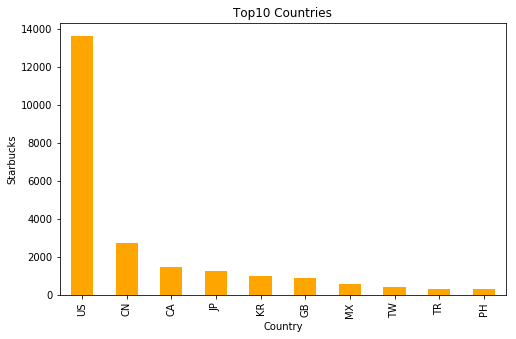

In [11]:
# graph of top10 countries
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top10 Countries", xlabel = 'Country', ylabel = 'Starbucks')
df.Country.value_counts().head(10).plot(kind="bar", color = "orange")

In [12]:
# number of cities
len(df.City.unique())

5470

In [13]:
# top 10 cities
df.City.value_counts().head(10)

上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Las Vegas      156
Seattle        156
Name: City, dtype: int64

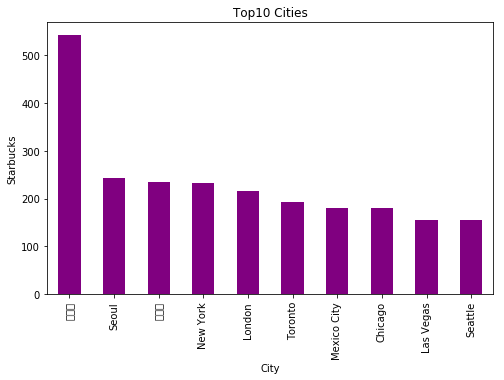

In [14]:
# graph of top10 cities
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set(title = "Top10 Cities", xlabel = 'City', ylabel = 'Starbucks')
df.City.value_counts().head(10).plot(kind="bar", color = "purple")

In [15]:
# ownership type of Starbucks
df['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

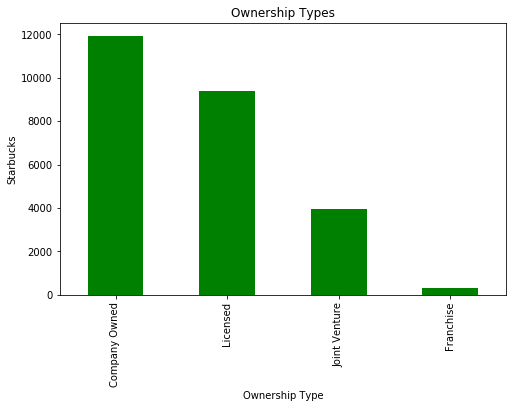

In [16]:
# graph of ownership types
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Ownership Types", xlabel = 'Ownership Type', ylabel = 'Starbucks')
df['Ownership Type'].value_counts().plot(kind="bar", color = "green")
plt.show()

**Characteristics of the data**
- The number of Starbucks coffee shops in the world is 25600.
- Some columns(such as 'Post code', 'Phone Number', 'City' and so on) have incomplete data.
- Starbucks cofffee shops are located in 73 countries and 5470 cities.
- '上海市' city and 'US' country have the greatest number of Starbucks coffee shops.
- Ownership of the most Starbucks coffee shops is 'Company Owned.'

### 2) Cleaning Data

> - Drop unnecessary columns
- Convert NaN to the blank
- Add country name and country code
- Delete incomplete data and merge cells
- Rename specific columns
- Merge two dataframes

**Starbucks data**

- Drop unnecessary columns

In [17]:
df.drop(['Store Number','Phone Number','Timezone'], axis=1, inplace=True)

In [18]:
df.head()

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
0,Starbucks,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,1.53,42.51
1,Starbucks,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,55.47,25.42
2,Starbucks,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,55.47,25.39
3,Starbucks,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,54.38,24.48
4,Starbucks,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,54.54,24.51


- Convert NaN to the blank

In [19]:
# count the number of null
df.isnull().sum()

Brand                0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Longitude            1
Latitude             1
dtype: int64

In [20]:
# convert NaN to blank
df = df.fillna('')

In [21]:
# check
df.isnull().sum()

Brand             0
Store Name        0
Ownership Type    0
Street Address    0
City              0
State/Province    0
Country           0
Postcode          0
Longitude         0
Latitude          0
dtype: int64

- Add country name and country code

In [22]:
country_code = [('Afghanistan','AF','AFG'),('Aland Islands','AX','ALA'),('Albania','AL','ALB'),('Algeria','DZ','DZA'),('American Samoa','AS','ASM'),('Andorra','AD','AND'),('Angola','AO','AGO'),('Anguilla','AI','AIA'),('Antarctica','AQ','ATA'),('Antigua and Barbuda','AG','ATG'),('Argentina','AR','ARG'),('Armenia','AM','ARM'),('Aruba','AW','ABW'),('Australia','AU','AUS'),('Austria','AT','AUT'),('Azerbaijan','AZ','AZE'),('Bahamas','BS','BHS'),('Bahrain','BH','BHR'),('Bangladesh','BD','BGD'),('Barbados','BB','BRB'),('Belarus','BY','BLR'),('Belgium','BE','BEL'),('Belize','BZ','BLZ'),('Benin','BJ','BEN'),('Bermuda','BM','BMU'),('Bhutan','BT','BTN'),('Bolivia','BO','BOL'),('Bosnia and Herzegovina','BA','BIH'),('Botswana','BW','BWA'),('Bouvet Island','BV','BVT'),('Brazil','BR','BRA'),('British Virgin Islands','VG','VGB'),('British Indian Ocean Territory','IO','IOT'),('Brunei Darussalam','BN','BRN'),('Bulgaria','BG','BGR'),('Burkina Faso','BF','BFA'),('Burundi','BI','BDI'),('Cambodia','KH','KHM'),('Cameroon','CM','CMR'),('Canada','CA','CAN'),('Cape Verde','CV','CPV'),('Cayman Islands','KY','CYM'),('Central African Republic','CF','CAF'),('Chad','TD','TCD'),('Chile','CL','CHL'),('China','CN','CHN'),('Hong Kong, Special Administrative Region of China','HK','HKG'),('Macao, Special Administrative Region of China','MO','MAC'),('Christmas Island','CX','CXR'),('Cocos (Keeling) Islands','CC','CCK'),('Colombia','CO','COL'),('Comoros','KM','COM'),('Congo (Brazzaville)','CG','COG'),('Congo, Democratic Republic of the','CD','COD'),('Cook Islands','CK','COK'),('Costa Rica','CR','CRI'),('Côte dIvoire','CI','CIV'),('Croatia','HR','HRV'),('Cuba','CU','CUB'),('Cyprus','CY','CYP'),('Czech Republic','CZ','CZE'),('Denmark','DK','DNK'),('Djibouti','DJ','DJI'),('Dominica','DM','DMA'),('Dominican Republic','DO','DOM'),('Ecuador','EC','ECU'),('Egypt','EG','EGY'),('El Salvador','SV','SLV'),('Equatorial Guinea','GQ','GNQ'),('Eritrea','ER','ERI'),('Estonia','EE','EST'),('Ethiopia','ET','ETH'),('Falkland Islands (Malvinas)','FK','FLK'),('Faroe Islands','FO','FRO'),('Fiji','FJ','FJI'),('Finland','FI','FIN'),('France','FR','FRA'),('French Guiana','GF','GUF'),('French Polynesia','PF','PYF'),('French Southern Territories','TF','ATF'),('Gabon','GA','GAB'),('Gambia','GM','GMB'),('Georgia','GE','GEO'),('Germany','DE','DEU'),('Ghana','GH','GHA'),('Gibraltar','GI','GIB'),('Greece','GR','GRC'),('Greenland','GL','GRL'),('Grenada','GD','GRD'),('Guadeloupe','GP','GLP'),('Guam','GU','GUM'),('Guatemala','GT','GTM'),('Guernsey','GG','GGY'),('Guinea','GN','GIN'),('Guinea-Bissau','GW','GNB'),('Guyana','GY','GUY'),('Haiti','HT','HTI'),('Heard Island and Mcdonald Islands','HM','HMD'),('Holy See (Vatican City State)','VA','VAT'),('Honduras','HN','HND'),('Hungary','HU','HUN'),('Iceland','IS','ISL'),('India','IN','IND'),('Indonesia','ID','IDN'),('Iran, Islamic Republic of','IR','IRN'),('Iraq','IQ','IRQ'),('Ireland','IE','IRL'),('Isle of Man','IM','IMN'),('Israel','IL','ISR'),('Italy','IT','ITA'),('Jamaica','JM','JAM'),('Japan','JP','JPN'),('Jersey','JE','JEY'),('Jordan','JO','JOR'),('Kazakhstan','KZ','KAZ'),('Kenya','KE','KEN'),('Kiribati','KI','KIR'),("Korea, Democratic People's Republic of",'KP','PRK'),('Korea, Republic of','KR','KOR'),('Kuwait','KW','KWT'),('Kyrgyzstan','KG','KGZ'),('Lao PDR','LA','LAO'),('Latvia','LV','LVA'),('Lebanon','LB','LBN'),('Lesotho','LS','LSO'),('Liberia','LR','LBR'),('Libya','LY','LBY'),('Liechtenstein','LI','LIE'),('Lithuania','LT','LTU'),('Luxembourg','LU','LUX'),
                ('Macedonia, Republic of','MK','MKD'),('Madagascar','MG','MDG'),('Malawi','MW','MWI'),('Malaysia','MY','MYS'),('Maldives','MV','MDV'),('Mali','ML','MLI'),('Malta','MT','MLT'),('Marshall Islands','MH','MHL'),('Martinique','MQ','MTQ'),('Mauritania','MR','MRT'),('Mauritius','MU','MUS'),('Mayotte','YT','MYT'),('Mexico','MX','MEX'),('Micronesia, Federated States of','FM','FSM'),('Moldova','MD','MDA'),('Monaco','MC','MCO'),('Mongolia','MN','MNG'),('Montenegro','ME','MNE'),('Montserrat','MS','MSR'),('Morocco','MA','MAR'),('Mozambique','MZ','MOZ'),('Myanmar','MM','MMR'),('Namibia','NA','NAM'),('Nauru','NR','NRU'),('Nepal','NP','NPL'),('Netherlands','NL','NLD'),('Netherlands Antilles','AN','ANT'),('New Caledonia','NC','NCL'),('New Zealand','NZ','NZL'),('Nicaragua','NI','NIC'),('Niger','NE','NER'),('Nigeria','NG','NGA'),('Niue','NU','NIU'),('Norfolk Island','NF','NFK'),('Northern Mariana Islands','MP','MNP'),('Norway','NO','NOR'),('Oman','OM','OMN'),('Pakistan','PK','PAK'),('Palau','PW','PLW'),('Palestinian Territory, Occupied','PS','PSE'),('Panama','PA','PAN'),('Papua New Guinea','PG','PNG'),('Paraguay','PY','PRY'),('Peru','PE','PER'),('Philippines','PH','PHL'),('Pitcairn','PN','PCN'),('Poland','PL','POL'),('Portugal','PT','PRT'),('Puerto Rico','PR','PRI'),('Qatar','QA','QAT'),('Réunion','RE','REU'),('Romania','RO','ROU'),('Russian Federation','RU','RUS'),('Rwanda','RW','RWA'),('Saint-Barthélemy','BL','BLM'),('Saint Helena','SH','SHN'),('Saint Kitts and Nevis','KN','KNA'),('Saint Lucia','LC','LCA'),('Saint-Martin (French part)','MF','MAF'),('Saint Pierre and Miquelon','PM','SPM'),('Saint Vincent and Grenadines','VC','VCT'),('Samoa','WS','WSM'),('San Marino','SM','SMR'),('Sao Tome and Principe','ST','STP'),('Saudi Arabia','SA','SAU'),('Senegal','SN','SEN'),('Serbia','RS','SRB'),('Seychelles','SC','SYC'),('Sierra Leone','SL','SLE'),('Singapore','SG','SGP'),('Slovakia','SK','SVK'),('Slovenia','SI','SVN'),('Solomon Islands','SB','SLB'),('Somalia','SO','SOM'),('South Africa','ZA','ZAF'),('South Georgia and the South Sandwich Islands','GS','SGS'),('South Sudan','SS','SSD'),('Spain','ES','ESP'),('Sri Lanka','LK','LKA'),('Sudan','SD','SDN'),('Suriname *','SR','SUR'),('Svalbard and Jan Mayen Islands','SJ','SJM'),('Swaziland','SZ','SWZ'),('Sweden','SE','SWE'),('Switzerland','CH','CHE'),('Syrian Arab Republic (Syria)','SY','SYR'),('Taiwan, Republic of China','TW','TWN'),('Tajikistan','TJ','TJK'),('Tanzania *, United Republic of','TZ','TZA'),('Thailand','TH','THA'),('Timor-Leste','TL','TLS'),('Togo','TG','TGO'),('Tokelau','TK','TKL'),('Tonga','TO','TON'),('Trinidad and Tobago','TT','TTO'),('Tunisia','TN','TUN'),('Turkey','TR','TUR'),('Turkmenistan','TM','TKM'),('Turks and Caicos Islands','TC','TCA'),('Tuvalu','TV','TUV'),('Uganda','UG','UGA'),('Ukraine','UA','UKR'),('United Arab Emirates','AE','ARE'),('United Kingdom','GB','GBR'),('United States of America','US','USA'),('United States Minor Outlying Islands','UM','UMI'),('Uruguay','UY','URY'),('Uzbekistan','UZ','UZB'),('Vanuatu','VU','VUT'),('Venezuela (Bolivarian Republic of)','VE','VEN'),('Viet Nam','VN','VNM'),('Virgin Islands, US','VI','VIR'),('Wallis and Futuna Islands','WF','WLF'),('Western Sahara','EH','ESH'),
                ('Yemen','YE','YEM'),('Zambia','ZM','ZMB'),('Zimbabwe','ZW','ZWE')]
labels = ["CountryName","Country","CountryCode"]
cc_df = pd.DataFrame.from_records(country_code,columns=labels)

In [23]:
df = pd.merge(df,cc_df,on="Country",how="left")
df.head()

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude,CountryName,CountryCode
0,Starbucks,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,1.53,42.51,Andorra,AND
1,Starbucks,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,,55.47,25.42,United Arab Emirates,ARE
2,Starbucks,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,,55.47,25.39,United Arab Emirates,ARE
3,Starbucks,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,,54.38,24.48,United Arab Emirates,ARE
4,Starbucks,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,,54.54,24.51,United Arab Emirates,ARE


In [24]:
df.drop(['Country'], axis=1, inplace=True)

In [25]:
df.sample()

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Longitude,Latitude,CountryName,CountryCode
12517,Starbucks,Safeway-Sedona #1207,Licensed,2300 SR-89A,Sedona,AZ,86336,-111.8,34.86,United States of America,USA


**Toronto data**

In [26]:
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050.'
r=requests.get(url)

In [27]:
#Read the table
df_table = pd.read_html(url)
df_table = df_table[0]
df_table

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


In [28]:
# read csv
df_coordinates = pd.read_csv('http://cocl.us/Geospatial_data')
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


- Delete incomplete data and merge cells

In [29]:
#Select the rows that need to be deleted
df_table_clean = df_table[df_table['Borough']!='Not assigned']

#Group the data for repeated postcodes
#Keep columns PostCode and Borough, and merge Neighbourhood cells with the same postcodes or boroughs
df_table_clean = df_table_clean.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_table_clean.head(5)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


- Rename specific columns

In [30]:
df_coordinates.rename(columns={"Postal Code": "Postcode"}, inplace = True)
df_coordinates

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


- Merge two dataframes

In [31]:
# Merging the two dataframes
final_df = pd.merge(df_table_clean, df_coordinates, on="Postcode")
final_df.head(5)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## 3. Data Analysis

In [75]:
# define Foursquare credentials and version
CLIENT_ID = 'Remove it' # your Foursquare ID
CLIENT_SECRET = 'Remove it' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Remove it
CLIENT_SECRET:Remove it


In [33]:
# make a count df
count = df['CountryName'].value_counts().to_frame().reset_index().rename(columns={"index":"CountryName","CountryName":"Count"})
count.head()

,CountryName,Count
0,United States of America,13608
1,China,2734
2,Canada,1468
3,Japan,1237
4,"Korea, Republic of",993


In [34]:
# Selectin Toronto only
df_to=df[df['City'] == "Toronto"]
df_to.head()

,Brand,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Longitude,Latitude,CountryName,CountryCode
1563,Starbucks,Church & Gerrard,Company Owned,66 Gerrard Street East,Toronto,ON,M5B 1G3,-79.38,43.66,Canada,CAN
1564,Starbucks,Dundas & Roncesvalles,Company Owned,2201 Dundas Street West,Toronto,ON,M6R 1X5,-79.45,43.65,Canada,CAN
1565,Starbucks,Dundas & Aukland,Company Owned,5251 Dundas Street West,Toronto,ON,M9B 1B2,-79.54,43.64,Canada,CAN
1566,Starbucks,University of Toronto/Toronto/Medic,Licensed,1 King's College Circle,Toronto,ON,M5S 1A8,-79.4,43.66,Canada,CAN
1567,Starbucks,250 Queen St. W.,Company Owned,250 Queen Street West,Toronto,ON,M5V 1Z7,-79.39,43.65,Canada,CAN


In [35]:
# Selectin Toronto neighborhoods only
final_df_toronto=final_df[final_df['Borough'].str.contains("Toronto")]
final_df_toronto.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [36]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Canada are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Canada are 43.6534817, -79.3839347.


In [37]:
map_toronto_simple = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Stamen Toner')

# add markers to map
for n in df_to.index:
    folium.Marker([df_to['Latitude'][n],df_to['Longitude'][n]], popup=df_to['Store Name'][n]).add_to(map_toronto_simple)
    
map_toronto_simple

In [38]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood, postcode in zip(final_df_toronto['Latitude'], final_df_toronto['Longitude'], final_df_toronto['Borough'], final_df_toronto['Neighbourhood'], final_df_toronto['Postcode']):
    label = '{}, {}'.format(postcode, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [39]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postcode in zip(df_to['Latitude'], df_to['Longitude'], df_to['Street Address'], df_to['Postcode']):
    label = '{}, {}'.format(postcode, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

for lat, lng, borough, neighborhood, postcode in zip(final_df_toronto['Latitude'], final_df_toronto['Longitude'], final_df_toronto['Borough'], final_df_toronto['Neighbourhood'], final_df_toronto['Postcode']):
    label = '{}, {}'.format(postcode, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [40]:
neighborhood_latitude = final_df_toronto['Latitude'].iloc[0] # neighborhood latitude value
neighborhood_longitude = final_df_toronto['Longitude'].iloc[0] # neighborhood longitude value

neighborhood_name = final_df_toronto['Neighbourhood'].iloc[0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [41]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XMQUBL3ZEQU30YVJH2H0DMDXJBYPXTOUAWNNNZOILWSCT2C5&client_secret=MTMMQSUKZXLOLQDKWVEMPKN0KUDHP0FM3XUUKR2JFTCZP3EJ&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e82cb219fcb92001c4cb092'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

In [43]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    # comment: venue list is an list of lists ==> second item = list, first item = name, lat, lng , ect... 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
Toronto_venues = getNearbyVenues(names=final_df_toronto['Neighbourhood'],
                                   latitudes=final_df_toronto['Latitude'],
                                   longitudes=final_df_toronto['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [47]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [48]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,77,77,77,77,77,77
"Chinatown, Grange Park, Kensington Market",79,79,79,79,79,79
Christie,17,17,17,17,17,17


In [49]:
# one hot encoding
toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = Toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot.columns[-1]
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [50]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.020000,0.000000,0.00,0.010000,0.000000,0.020000,0.0000,0.000000,0.000000,0.000000,0.030000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.020000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,0.010000,0.010000,0.00,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [51]:
temp = toronto_grouped[toronto_grouped['Neighbourhood'] == 'Harbourfront'].T.reset_index()
temp.columns = ['venue','freq']
temp

,venue,freq
0,Neighbourhood,Harbourfront
1,Afghan Restaurant,0
2,Airport,0
3,Airport Food Court,0
4,Airport Gate,0
5,Airport Lounge,0
6,Airport Service,0
7,Airport Terminal,0
8,American Restaurant,0
9,Antique Shop,0.0217391


In [52]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    
    # take each column and flip it (transpose)
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    
    # slect from row 1 because we do not want to select "Neigborhood and hood" that are in the first row (0)
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
         venue  freq
0  Coffee Shop  0.07
1   Restaurant  0.06
2         Café  0.05
3       Bakery  0.03
4          Bar  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3      Farmers Market  0.04
4            Beer Bar  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3   Grocery Store  0.04
4   Burrito Place  0.04


----Business Reply Mail Processing Centre 969 Eastern----
              venue  freq
0        Comic Shop  0.06
1     Auto Workshop  0.06
2              Park  0.06
3  Recording Studio  0.06
4        Restaurant  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0    Airport Lounge  0.12
1  Airport Terminal  0.12
2               Bar  0.06
3   Harbor / Ma

In [53]:
def return_most_common_venues(row, num_top_venues):
    
    #select all the column except the first one (Neighborhoods)
    row_categories = row.iloc[1:]
    
    # sort the columns in decending order
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    # return only top 10
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe with the columns above
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

# in the column Neighbourhood, put the Neighborhood names found in toronto_gouped dataframe
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

# for each row (Neighborhood) in the dataframe toronto_grouped
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Café,Bar,Bakery,Office,Pizza Place,Clothing Store,Hotel,Sushi Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Café,Bakery,Restaurant,Beer Bar,Farmers Market,Seafood Restaurant,Shopping Mall
2,"Brockton, Exhibition Place, Parkdale Village",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Grocery Store,Pet Store,Performing Arts Venue,Nightclub,Italian Restaurant,Intersection
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Auto Workshop,Comic Shop,Pizza Place,Recording Studio,Restaurant,Burrito Place,Brewery,Skate Park,Spa
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Terminal,Boat or Ferry,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Airport Service,Coffee Shop,Rental Car Location


In [55]:
# the number of each postcode
df_to.loc[:,'Postcode'] = df_to.loc[:,'Postcode'].str[:4]
df_to['Postcode'].value_counts().head(10)

D:\DS\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


M5V     18
M5J     15
M5B      9
M5G      9
M4W      7
M4Y      7
M5H      6
M5S      5
M4P      5
M5E      4
Name: Postcode, dtype: int64

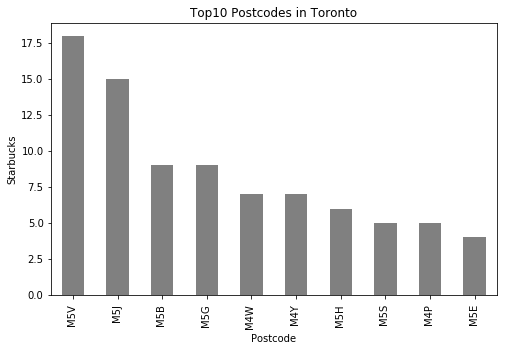

In [56]:
# graph of top10 postcode
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top10 Postcodes in Toronto", xlabel = 'Postcode', ylabel = 'Starbucks')
df_to['Postcode'].value_counts().head(10).plot(kind="bar", color = "gray")

In [57]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().head(10)

Coffee Shop        15
Café                3
Bar                 2
Clothing Store      2
Gift Shop           1
Tennis Court        1
Pizza Place         1
Dessert Shop        1
Park                1
Thai Restaurant     1
Name: 1st Most Common Venue, dtype: int64

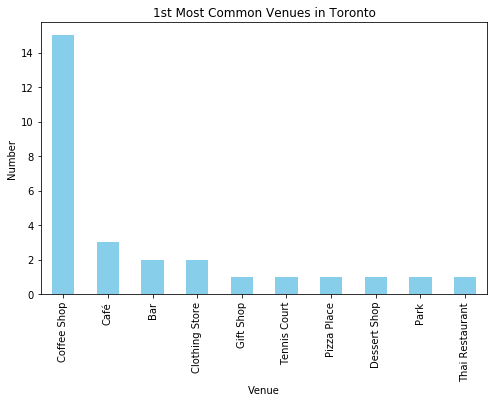

In [58]:
# graph of top10 postcode
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "1st Most Common Venues in Toronto", xlabel = 'Venue', ylabel = 'Number')
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().head(10).plot(kind="bar", color = "skyblue")

In [59]:
neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts().head(10)

Café                   6
Coffee Shop            4
Restaurant             3
Park                   3
Italian Restaurant     2
Hotel                  1
Mexican Restaurant     1
Sporting Goods Shop    1
Bookstore              1
Bakery                 1
Name: 2nd Most Common Venue, dtype: int64

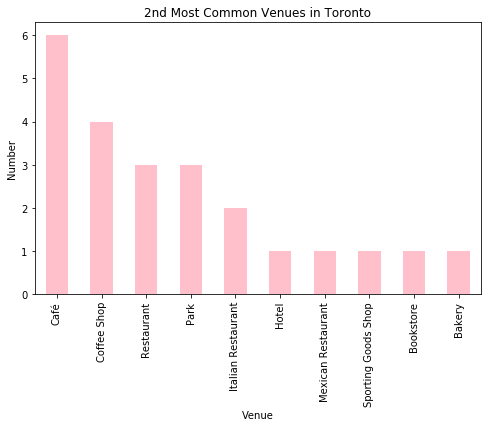

In [60]:
# graph of top10 postcode
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "2nd Most Common Venues in Toronto", xlabel = 'Venue', ylabel = 'Number')
neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts().head(10).plot(kind="bar", color = "pink")

In [61]:
neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts().head(10)

Café              5
Coffee Shop       3
Restaurant        3
Trail             2
Park              2
Sandwich Place    2
Pub               2
Gastropub         1
Comic Shop        1
Bakery            1
Name: 3rd Most Common Venue, dtype: int64

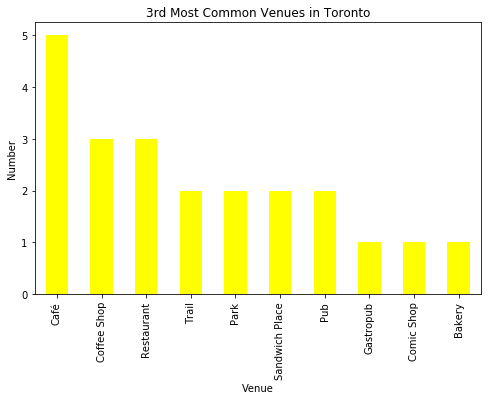

In [62]:
# graph of top10 postcode
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "3rd Most Common Venues in Toronto", xlabel = 'Venue', ylabel = 'Number')
neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts().head(10).plot(kind="bar", color = "yellow")

In [63]:
# set number of clusters
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 9, 9, 9, 9, 1, 9, 9, 1])

In [64]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = final_df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Neighborhood,Trail,Pub,Health Food Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,9,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bookstore,Furniture / Home Store,Liquor Store,Spa,Brewery,Bubble Tea Shop
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1,Sandwich Place,Gym,Park,Brewery,Burrito Place,Restaurant,Pub,Pizza Place,Coffee Shop,Movie Theater
43,M4M,East Toronto,Studio District,43.659526,-79.340923,9,Café,Coffee Shop,Gastropub,Brewery,Bakery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,7,Photography Studio,Park,Bus Line,Swim School,Diner,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


       
map_clusters

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


# add markers to map
for n in df_to.index:
    folium.Marker([df_to['Latitude'][n],df_to['Longitude'][n]], popup=df_to['Store Name'][n]).add_to(map_clusters)
    
    
map_clusters

## 4. Results

**1) Characteristics of the 'starbucks.csv'**

- The number of Starbucks coffee shops in the world is 25600.
- Some columns(such as 'Post code', 'Phone Number', 'City' and so on) have incomplete data.
- Starbucks cofffee shops are located in 73 countries and 5470 cities.
- '上海市' city and 'US' country have the greatest number of Starbucks coffee shops.
- Ownership of the most Starbucks coffee shops is 'Company Owned.'

**2) Location of Starbucks in Toronto**

In [67]:
map_toronto_simple = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Stamen Toner')

# add markers to map
for n in df_to.index:
    folium.Marker([df_to['Latitude'][n],df_to['Longitude'][n]], popup=df_to['Store Name'][n]).add_to(map_toronto_simple)
    
map_toronto_simple

**3) Location of neighborhoods in Toronto**

In [68]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood, postcode in zip(final_df_toronto['Latitude'], final_df_toronto['Longitude'], final_df_toronto['Borough'], final_df_toronto['Neighbourhood'], final_df_toronto['Postcode']):
    label = '{}, {}'.format(postcode, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

**4) Location of Starbucks and neighborhoods in Toronto**

In [69]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postcode in zip(df_to['Latitude'], df_to['Longitude'], df_to['Street Address'], df_to['Postcode']):
    label = '{}, {}'.format(postcode, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

for lat, lng, borough, neighborhood, postcode in zip(final_df_toronto['Latitude'], final_df_toronto['Longitude'], final_df_toronto['Borough'], final_df_toronto['Neighbourhood'], final_df_toronto['Postcode']):
    label = '{}, {}'.format(postcode, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

**5) Graph of 1st Most Common Venues in Toronto**

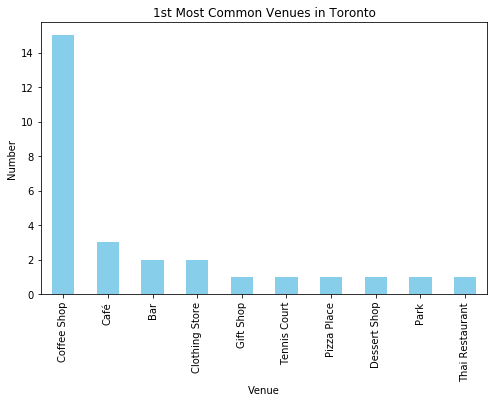

In [70]:
# graph of 1st Most Common Venues in Toronto
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "1st Most Common Venues in Toronto", xlabel = 'Venue', ylabel = 'Number')
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().head(10).plot(kind="bar", color = "skyblue")

**6) Graph of 2nd Most Common Venues in Toronto**

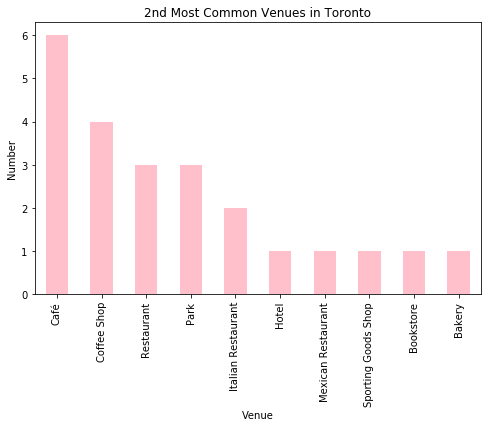

In [71]:
# graph of 2nd Most Common Venues in Toronto
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "2nd Most Common Venues in Toronto", xlabel = 'Venue', ylabel = 'Number')
neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts().head(10).plot(kind="bar", color = "pink")

**7) Graph of 3rd Most Common Venues in Toronto**

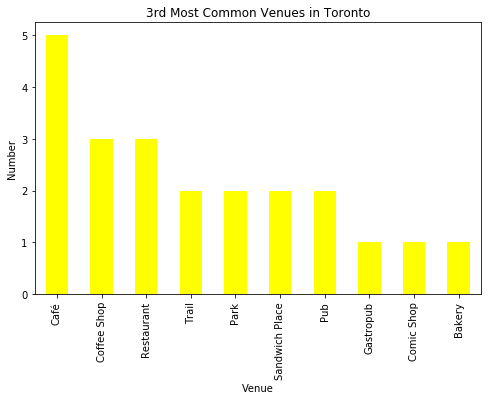

In [72]:
# graph of 3rd Most Common Venues in Toronto
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "3rd Most Common Venues in Toronto", xlabel = 'Venue', ylabel = 'Number')
neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts().head(10).plot(kind="bar", color = "yellow")

**8) Graph of top10 postcodes of Starbucks in Toronto**

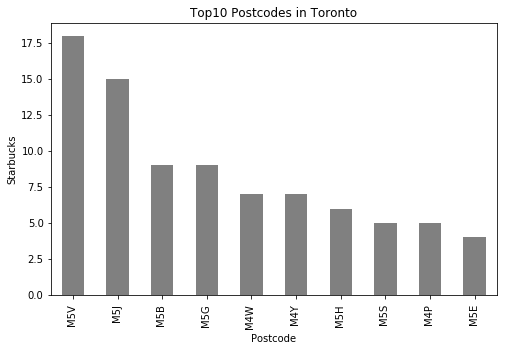

In [73]:
# graph of top10 postcode
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top10 Postcodes in Toronto", xlabel = 'Postcode', ylabel = 'Starbucks')
df_to['Postcode'].value_counts().head(10).plot(kind="bar", color = "gray")

**9) Location of Starbucks and clusters of neighborhoods in Toronto**

In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


# add markers to map
for n in df_to.index:
    folium.Marker([df_to['Latitude'][n],df_to['Longitude'][n]], popup=df_to['Store Name'][n]).add_to(map_clusters)
    
    
map_clusters